## Data Loading and Initialization

### Import Libraries

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

This project utilises Pandas for data manipulation and analysis, and employs Matplotlib, Seaborn, and Squarify for data visualisation.

In [ ]:
!pip install pandas matplotlib seaborn squarify

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

### Load Datasets

The project uses three datasets: two sourced from Kaggle that provide data on movies and TV shows, and a third dataset on subscription plans that I collected independently.

In [4]:
movies_data = pd.read_csv('Data/movies_data.csv')
movies_data.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [5]:
tv_shows = pd.read_csv('Data/tv_shows.csv')
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [6]:
svod_ad_plans = pd.read_csv('Data/svod_ad_plans.csv')
svod_ad_plans

,SN,Platform,Plan Name,Ad-Supported,Resolution,Devices Supported,Download Support,Price (US$)
0,1,Disney+,Basic,Yes,1080p,2,No,$7.99
1,2,Hulu,Hulu (With Ads),Yes,1080p,2,No,$7.99
2,3,Netflix,Standard with ads,Yes,1080p,2,Yes,$6.99
3,4,Prime Video,Prime Video,Yes,1080p,2,Yes,$8.99


**Note:** The data collected for subscription plans include only the most basic and cost-effective options from each platform, deliberately omitting bundled packages, special offers, and additional perks to ensure a uniform and objective comparison.

## Data Cleaning and Standardization

### Create New Column: Platform

For the purpose of simplifying the analysis of show availability, I'm creating a new 'Platform' column by combining the existing platform columns and filtering for shows that are available on each platform.

In [7]:
movies_streaming = (
    movies_data[['Title', 'Netflix', 'Hulu', 'Disney+', 'Prime Video']]
    # Transform the DataFrame from wide to long format
    .melt(id_vars=['Title'], var_name='Platform', value_name='Available')
    # Filter rows where 'Available' is 1 (i.e., the show is available on the platform)
    .query("Available == 1")
    # Drop the 'Available' column as it's no longer needed
    .drop(columns=['Available'])
)
movies_streaming.head()

,Title,Platform
0,The Irishman,Netflix
1,Dangal,Netflix
2,David Attenborough: A Life on Our Planet,Netflix
3,Lagaan: Once Upon a Time in India,Netflix
4,Roma,Netflix


In [8]:
# Merge the movies_streaming DataFrame with the movies_data DataFrame on 'Title' to combine streaming availability with other details
movies_expanded = movies_streaming.merge(movies_data, on='Title', how='inner')
# Drop the streaming platform columns as they are no longer needed after the merge
movies_expanded.drop(columns=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], inplace=True)
movies_expanded.head()

,Title,Platform,Unnamed: 0,ID,Year,Age,Rotten Tomatoes,Type
0,The Irishman,Netflix,0,1,2019,18+,98/100,0
1,Dangal,Netflix,1,2,2016,7+,97/100,0
2,David Attenborough: A Life on Our Planet,Netflix,2,3,2020,7+,95/100,0
3,Lagaan: Once Upon a Time in India,Netflix,3,4,2001,7+,94/100,0
4,Roma,Netflix,4,5,2018,18+,94/100,0


In [9]:
tv_shows_streaming = (
    tv_shows[['Title', 'Netflix', 'Hulu', 'Disney+', 'Prime Video']]
    # Transform the DataFrame from wide to long format
    .melt(id_vars=['Title'], var_name='Platform', value_name='Available')
    # Filter rows where 'Available' is 1 (i.e., the show is available on the platform)
    .query("Available == 1")
    # Drop the 'Available' column as it's no longer needed
    .drop(columns=['Available'])
)

tv_shows_streaming.head()

,Title,Platform
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Attack on Titan,Netflix
3,Better Call Saul,Netflix
4,Dark,Netflix


In [10]:
# Merge the tv_shows_streaming DataFrame with the tv_shows DataFrame on 'Title' to combine streaming availability with other details
tv_shows_expanded = tv_shows_streaming.merge(tv_shows, on='Title', how='inner')
# Drop the streaming platform columns as they are no longer needed after the merge
tv_shows_expanded.drop(columns=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], inplace=True)
tv_shows_expanded.head()

,Title,Platform,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Type
0,Breaking Bad,Netflix,0,1,2008,18+,9.4/10,100/100,1
1,Stranger Things,Netflix,1,2,2016,16+,8.7/10,96/100,1
2,Attack on Titan,Netflix,2,3,2013,18+,9.0/10,95/100,1
3,Better Call Saul,Netflix,3,4,2015,18+,8.8/10,94/100,1
4,Dark,Netflix,4,5,2017,16+,8.8/10,93/100,1


### Create New Column: Maturity Rating

While the dataset provides age ratings, using standardized maturity ratings (like PG, PG-13, R) would offer a more consistent and universally recognized way to categorize content. To streamline the analysis, I'll next convert the age ratings to corresponding maturity ratings.

In [11]:
movies_expanded['Age'].unique()

array(['18+', '7+', '13+', '16+', 'all', nan], dtype=object)

In [12]:
tv_shows_expanded['Age'].unique()

array(['18+', '16+', '7+', 'all', nan, '13+'], dtype=object)

First, I'll create a function called "assign_rating" that maps age ratings to MPAA film ratings.

In [13]:
def assign_rating(age):
  if age in ['18+', '16+']:
    return 'R'
  elif age == '13+':
    return 'PG-13'
  elif age == '7+':
    return 'PG'
  elif age == 'all':
    return 'G'
  else:
    return 'N/A'

**Note:** The MPAA film rating system is based on several factors, including violence, language, sexual content, drug use, and other potentially offensive material. This function provides an approximate mapping based on age, but it's important to note that the actual rating may vary depending on the specific content.

Next, I'm going to create a new column "Maturity Rating" for both dataframes and apply the assign_rating function to assign the ratings.

In [14]:
movies_expanded['Maturity Rating'] = movies_expanded['Age'].apply(assign_rating)
movies_expanded.head()

,Title,Platform,Unnamed: 0,ID,Year,Age,Rotten Tomatoes,Type,Maturity Rating
0,The Irishman,Netflix,0,1,2019,18+,98/100,0,R
1,Dangal,Netflix,1,2,2016,7+,97/100,0,PG
2,David Attenborough: A Life on Our Planet,Netflix,2,3,2020,7+,95/100,0,PG
3,Lagaan: Once Upon a Time in India,Netflix,3,4,2001,7+,94/100,0,PG
4,Roma,Netflix,4,5,2018,18+,94/100,0,R


In [15]:
tv_shows_expanded['Maturity Rating'] = tv_shows_expanded['Age'].apply(assign_rating)
tv_shows_expanded.head()

,Title,Platform,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Type,Maturity Rating
0,Breaking Bad,Netflix,0,1,2008,18+,9.4/10,100/100,1,R
1,Stranger Things,Netflix,1,2,2016,16+,8.7/10,96/100,1,R
2,Attack on Titan,Netflix,2,3,2013,18+,9.0/10,95/100,1,R
3,Better Call Saul,Netflix,3,4,2015,18+,8.8/10,94/100,1,R
4,Dark,Netflix,4,5,2017,16+,8.8/10,93/100,1,R


### Handle Missing Data

In [16]:
movies_expanded.isnull().sum()

Title                 0
Platform              0
Unnamed: 0            0
ID                    0
Year                  0
Age                4271
Rotten Tomatoes       7
Type                  0
Maturity Rating       0
dtype: int64

In [17]:
movies_expanded['Age'] = movies_expanded['Age'].fillna('N/A')
movies_expanded['Rotten Tomatoes'] = movies_expanded['Rotten Tomatoes'].fillna(0)

In [18]:
tv_shows_expanded.isnull().sum()

Title                 0
Platform              0
Unnamed: 0            0
ID                    0
Year                  0
Age                2192
IMDb                984
Rotten Tomatoes       0
Type                  0
Maturity Rating       0
dtype: int64

In [19]:
tv_shows_expanded['Age'] = tv_shows_expanded['Age'].fillna('N/A')
tv_shows_expanded['IMDb'] = tv_shows_expanded['IMDb'].fillna('N/A')

### Standardize Rating Data

In [20]:
# Extract the numerical part of Rotten Tomatoes ratings, which are formatted as 'x/100'
movies_expanded['Rotten Tomatoes'] = movies_expanded['Rotten Tomatoes'].str.split('/').str[0]
movies_expanded['Rotten Tomatoes'] = pd.to_numeric(movies_expanded['Rotten Tomatoes'], errors='coerce')
movies_expanded.head()

,Title,Platform,Unnamed: 0,ID,Year,Age,Rotten Tomatoes,Type,Maturity Rating
0,The Irishman,Netflix,0,1,2019,18+,98.0,0,R
1,Dangal,Netflix,1,2,2016,7+,97.0,0,PG
2,David Attenborough: A Life on Our Planet,Netflix,2,3,2020,7+,95.0,0,PG
3,Lagaan: Once Upon a Time in India,Netflix,3,4,2001,7+,94.0,0,PG
4,Roma,Netflix,4,5,2018,18+,94.0,0,R


In [21]:
# Extract the numerical part of Rotten Tomatoes ratings, which are formatted as 'x/100'
tv_shows_expanded['Rotten Tomatoes'] = tv_shows_expanded['Rotten Tomatoes'].str.split('/').str[0]
tv_shows_expanded['Rotten Tomatoes'] = pd.to_numeric(tv_shows_expanded['Rotten Tomatoes'], errors='coerce')
tv_shows_expanded.head()

,Title,Platform,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Type,Maturity Rating
0,Breaking Bad,Netflix,0,1,2008,18+,9.4/10,100,1,R
1,Stranger Things,Netflix,1,2,2016,16+,8.7/10,96,1,R
2,Attack on Titan,Netflix,2,3,2013,18+,9.0/10,95,1,R
3,Better Call Saul,Netflix,3,4,2015,18+,8.8/10,94,1,R
4,Dark,Netflix,4,5,2017,16+,8.8/10,93,1,R


In [22]:
# Extract the numerical part of IMDb ratings, which are formatted as 'x/10'
tv_shows_expanded['IMDb'] = tv_shows_expanded['IMDb'].str.split('/').str[0]
tv_shows_expanded['IMDb'] = pd.to_numeric(tv_shows_expanded['IMDb'], errors='coerce')
tv_shows_expanded.head()

,Title,Platform,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Type,Maturity Rating
0,Breaking Bad,Netflix,0,1,2008,18+,9.4,100,1,R
1,Stranger Things,Netflix,1,2,2016,16+,8.7,96,1,R
2,Attack on Titan,Netflix,2,3,2013,18+,9.0,95,1,R
3,Better Call Saul,Netflix,3,4,2015,18+,8.8,94,1,R
4,Dark,Netflix,4,5,2017,16+,8.8,93,1,R


### Optimize Dataset Structure

In [23]:
movies_expanded = movies_expanded[['Title', 'Platform', 'Year', 'Age', 'Maturity Rating', 'Rotten Tomatoes']]
movies_expanded.head()

,Title,Platform,Year,Age,Maturity Rating,Rotten Tomatoes
0,The Irishman,Netflix,2019,18+,R,98.0
1,Dangal,Netflix,2016,7+,PG,97.0
2,David Attenborough: A Life on Our Planet,Netflix,2020,7+,PG,95.0
3,Lagaan: Once Upon a Time in India,Netflix,2001,7+,PG,94.0
4,Roma,Netflix,2018,18+,R,94.0


In [24]:
tv_shows_expanded = tv_shows_expanded[['Title', 'Platform', 'Year', 'Age', 'Maturity Rating', 'IMDb', 'Rotten Tomatoes']]
tv_shows_expanded.head()

,Title,Platform,Year,Age,Maturity Rating,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,R,9.4,100
1,Stranger Things,Netflix,2016,16+,R,8.7,96
2,Attack on Titan,Netflix,2013,18+,R,9.0,95
3,Better Call Saul,Netflix,2015,18+,R,8.8,94
4,Dark,Netflix,2017,16+,R,8.8,93


## Exploratory Data Analysis

### Content Quantity Analysis

In this section, I'll delve into the quantitative aspects of content offerings, comparing the total number of TV shows and movies on each platform.

In [25]:
movies_expanded['Platform'].value_counts()

Platform
Prime Video    4113
Netflix        3695
Hulu           1047
Disney+         922
Name: count, dtype: int64

In [26]:
tv_shows_expanded['Platform'].value_counts()

Platform
Netflix        1971
Prime Video    1831
Hulu           1621
Disney+         351
Name: count, dtype: int64

In [27]:
total_content = pd.concat([tv_shows_expanded, movies_expanded])
total_content['Platform'].value_counts()

Platform
Prime Video    5944
Netflix        5666
Hulu           2668
Disney+        1273
Name: count, dtype: int64

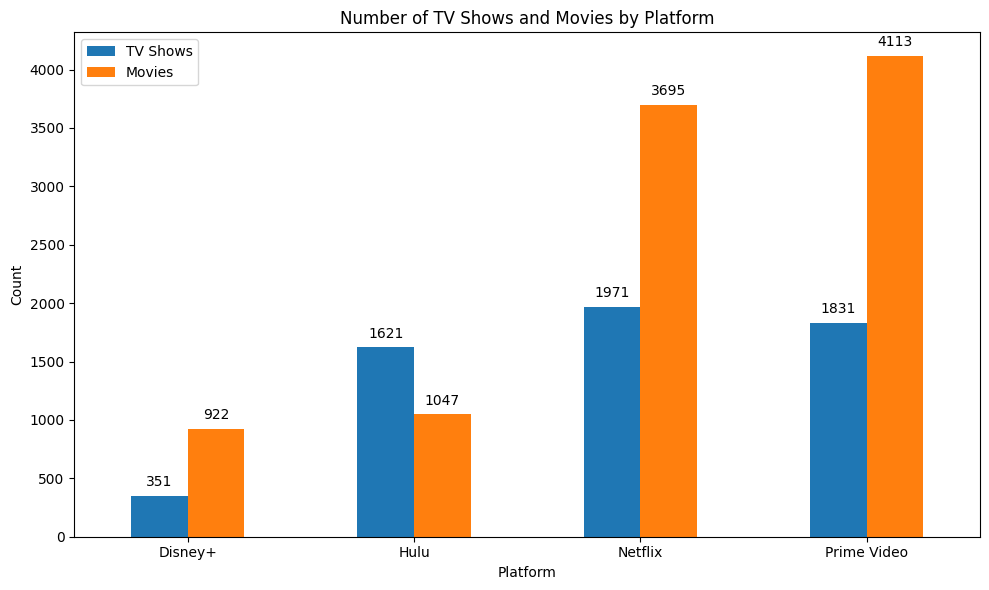

In [28]:
tv_counts = tv_shows_expanded['Platform'].value_counts()
movie_counts = movies_expanded['Platform'].value_counts()

combined_counts = pd.DataFrame({
    'TV Shows': tv_counts,
    'Movies': movie_counts
}).fillna(0)

ax = combined_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of TV Shows and Movies by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Prime Video dominates the streaming market with the highest combined number of TV shows and movies, offering a total of 5,944 items. The platform also boasts the largest movie library, featuring 4,113 films. Its vast collection of movie titles appeals to film enthusiasts and highlights its competitive stance in the streaming landscape.

Netflix comes in a close second, offering a total of 5,666 items, which includes 1,971 TV shows and 3,695 movies. While Netflix maintains a diverse content library, its strength lies in its extensive movie collection.

Hulu's content library consists of 2,668 items, including 1,621 TV shows and 1,047 movies. It offers a balanced mix of TV shows and movies but leans more towards episodic content. This could indicate Hulu’s strategy to cater to viewers who prefer episodic content. However, there is a significant gap in overall content quantity compared to Netflix and Prime Video.

Disney+ offers a total of 1,273 items, consisting of 351 TV shows and 922 movies. While it provides a strong selection of movies, its content library is the smallest compared to its competitors.

### Content Maturity Analysis

To understand the content suitability for different audiences, I'll analyse the distribution of maturity ratings across various streaming platforms. This will help identify platforms that cater to specific age groups and provide insights into the content landscape for different demographics.

Here's a brief explanation of what each abbreviation represents:

- G (General Audiences): Contains no content that could be considered inappropriate for children of any age.
- PG (Parental Guidance Suggested): May contain content that some parents might consider inappropriate for children under the age of 8.
- PG-13 (Parents Strongly Cautioned): May contain material that may not be suitable for children under the age of 13.
- R (Restricted): Intended for adults. May contain content that is unsuitable for children under the age of 17.

In [29]:
movie_rating_pivot = movies_expanded.pivot_table(index='Platform', columns='Maturity Rating', values='Title', aggfunc='count', fill_value=0)
movie_rating_pivot = movie_rating_pivot.loc[:, movie_rating_pivot.columns != 'N/A']
movie_rating_pivot

Maturity Rating,G,PG,PG-13,R
Platform,,,,
Disney+,370,278,70,7
Hulu,36,98,175,409
Netflix,144,322,404,1028
Prime Video,160,421,397,1187


In [30]:
tv_shows_rating_pivot = tv_shows_expanded.pivot_table(index='Platform', columns='Maturity Rating', values='Title', aggfunc='count', fill_value=0)
tv_shows_rating_pivot = tv_shows_rating_pivot.loc[:, tv_shows_rating_pivot.columns != 'N/A']
tv_shows_rating_pivot

Maturity Rating,G,PG,PG-13,R
Platform,,,,
Disney+,129,109,0,23
Hulu,124,325,6,762
Netflix,176,299,3,866
Prime Video,173,213,2,372


In [31]:
total_rating_counts = movie_rating_pivot.add(tv_shows_rating_pivot, fill_value=0)
total_rating_counts

Maturity Rating,G,PG,PG-13,R
Platform,,,,
Disney+,499,387,70,30
Hulu,160,423,181,1171
Netflix,320,621,407,1894
Prime Video,333,634,399,1559


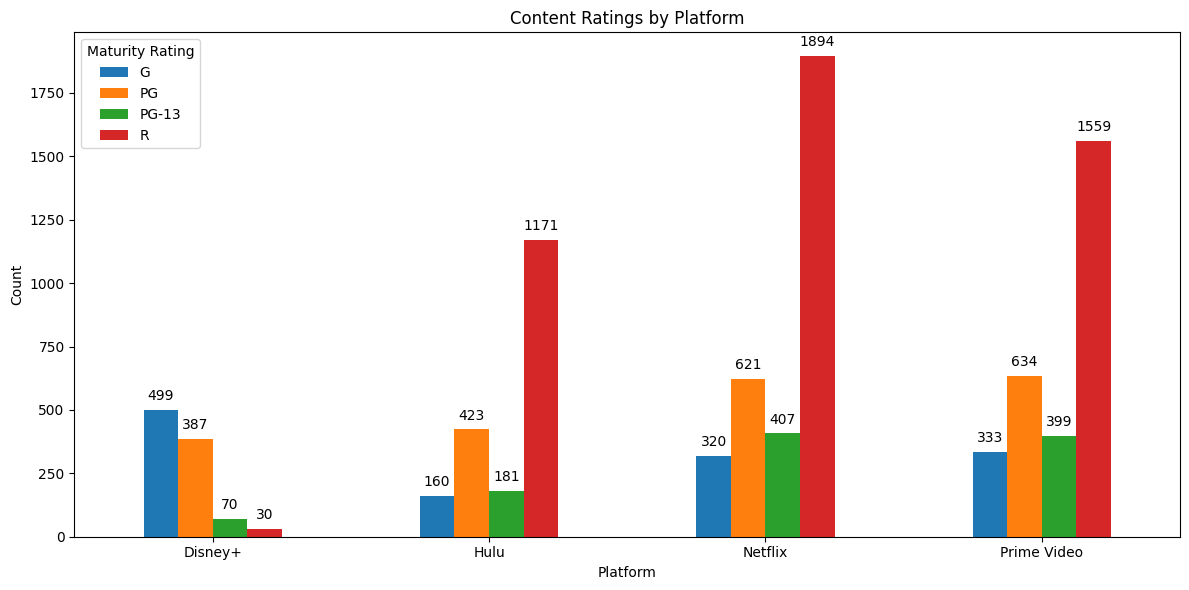

In [32]:
total_rating_counts.plot(kind='bar', figsize=(12, 6))

plt.title('Content Ratings by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.legend(title='Maturity Rating', loc='upper left')
plt.show()

Prime Video shows a diverse distribution across different maturity ratings, with 333 titles rated 'G', 634 rated 'PG', 399 rated 'PG-13', and 1,559 rated 'R'. Despite having a significant amount of 'R' rated content, Prime Video maintains a relatively balanced presence across the other ratings.

Netflix also shows a particular focus on 'R' rated content, with 1,894 items in this category. However, there is also a balanced presence of 'PG' (621 titles) and 'PG-13' (407 titles) content as well, with a moderate amount of 'G' content.

Hulu offers a diverse range of content but with a significant skew towards 'R' rated content (1,171 titles) as well. The platform has a relatively smaller amount of 'G' (160 titles) and 'PG' (423 titles) content, indicating a stronger focus on more mature audiences.

On the other hand, Disney+ focuses primarily on content rated 'G' (499 titles) and 'PG' (387 titles), aligning with its reputation as a family-friendly platform. The platform features minimal 'PG-13' (70 titles) and 'R' rated content (30 titles), catering primarily to a younger and more general audience.

### Rotten Tomatoes Rating Distribution

In this section, I'll analyze the distribution of Rotten Tomatoes ratings by binning the scores. Separate box plots will be created for movies and TV shows to compare trends and variances.

In [33]:
# Define rating bins for Rotten Tomatoes
rating_bins = [0, 20, 40, 60, 80, 100]

In [34]:
# Group movies data by platform and Rotten Tomatoes rating bins, and count the number of titles in each bin
rotten_tomatoes_movies = (
    movies_expanded
    .groupby(['Platform', pd.cut(movies_expanded['Rotten Tomatoes'], bins=rating_bins)])
    ['Title']
    .count()
    .unstack(fill_value=0)  # Ensure all rating bins are represented
)

rotten_tomatoes_movies

Rotten Tomatoes,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"
Platform,,,,,
Disney+,13,51,471,319,68
Hulu,5,24,503,474,41
Netflix,54,470,2033,984,147
Prime Video,50,739,2536,747,41


In [35]:
# Group TV shows data by platform and Rotten Tomatoes rating bins, and count the number of titles in each bin
rotten_tomatoes_tv = (
    tv_shows_expanded
    .groupby(['Platform', pd.cut(tv_shows_expanded['Rotten Tomatoes'], bins=rating_bins)])
    ['Title']
    .count()
    .unstack(fill_value=0)  # Ensure all rating bins are represented
)

rotten_tomatoes_tv

Rotten Tomatoes,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"
Platform,,,,,
Disney+,21,67,191,60,12
Hulu,143,232,669,487,90
Netflix,47,332,976,512,104
Prime Video,569,425,558,224,55


In [36]:
combined_rotten_tomatoes = rotten_tomatoes_tv.add(rotten_tomatoes_movies, fill_value=0)
combined_rotten_tomatoes

Rotten Tomatoes,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"
Platform,,,,,
Disney+,34,118,662,379,80
Hulu,148,256,1172,961,131
Netflix,101,802,3009,1496,251
Prime Video,619,1164,3094,971,96


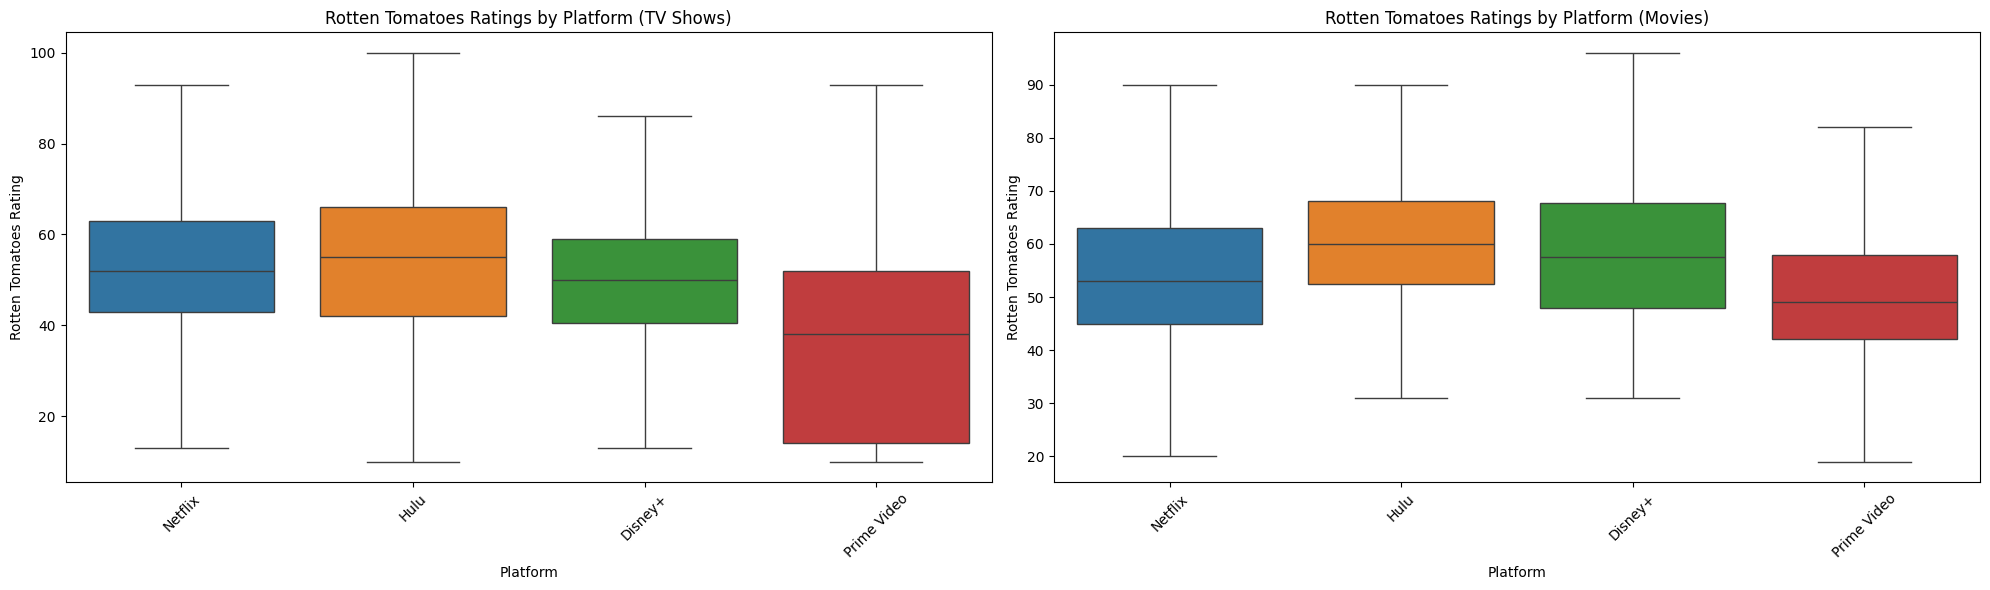

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

for i, (data, title) in enumerate([(tv_shows_expanded, 'TV Shows'), (movies_expanded, 'Movies')]):
    data['Rotten Tomatoes'] = pd.to_numeric(data['Rotten Tomatoes'], errors='coerce')
    sns.boxplot(x='Platform', y='Rotten Tomatoes', data=data, showfliers=False, hue='Platform', ax=axes[i])
    axes[i].set_title(f'Rotten Tomatoes Ratings by Platform ({title})')
    axes[i].set_xlabel('Platform')
    axes[i].set_ylabel('Rotten Tomatoes Rating')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Hulu's library displays a balanced distribution of ratings, with a median score range of 60-80 for both movies and TV shows. Hulu’s content shows a wide but balanced interquartile range (IQR), suggesting a good mix of moderately to highly-rated content without extreme lows.

Disney+ maintains consistent content quality, with a median score of around 60. The platform’s narrower IQR indicates a tighter clustering of content ratings, reflecting a focus on maintaining a steady level of quality across its library with fewer extreme highs or lows in ratings.

Netflix features a diverse range of content quality, with a median score in the 60-80 range for TV shows and 40-60 for movies. However, it has a broader range of ratings, including some very low and very high scores.

Prime Video’s content shows a lower median rating, around 60 for TV shows and 40-60 for movies, with wider variability in content quality, including a higher proportion of lower-rated titles for TV shows.

**Note:** Due to limited IMDb rating data, Rotten Tomatoes will serve as the primary measure of content quality for this project.

### Content Quality Analysis

This section examines the count of content that meets predefined quality standards. While the previous section focused on overall rating distribution, this section categorizes content into low, medium, and high-quality tiers using specific thresholds.

In [38]:
quality_threshold = tv_shows_expanded['Rotten Tomatoes'].quantile(0.5)  # 50th percentile
high_quality_threshold = tv_shows_expanded['Rotten Tomatoes'].quantile(0.75)  # 75th percentile

print(quality_threshold, high_quality_threshold)

49.0 62.0


In [39]:
# Define bins and labels for categorization
quality_bins = [-float('inf'), quality_threshold, high_quality_threshold, float('inf')]
labels = ['Low Quality (<49)', 'Medium Quality (49-61)', 'High Quality (≥62)']

In [40]:
movie_counts = (
    movies_expanded.groupby(
        ['Platform', pd.cut(movies_expanded['Rotten Tomatoes'], bins=quality_bins, labels=labels, right=False)]
    )['Title'].count()
    .unstack(fill_value=0)
)

movie_counts

Rotten Tomatoes,Low Quality (<49),Medium Quality (49-61),High Quality (≥62)
Platform,,,
Disney+,233,330,359
Hulu,160,402,485
Netflix,1319,1312,1057
Prime Video,2031,1372,710


In [41]:
tv_show_counts = (
    tv_shows_expanded.groupby(
        ['Platform', pd.cut(tv_shows_expanded['Rotten Tomatoes'], bins=quality_bins, labels=labels, right=False)]
    )['Title'].count()
    .unstack(fill_value=0)
)

tv_show_counts

Rotten Tomatoes,Low Quality (<49),Medium Quality (49-61),High Quality (≥62)
Platform,,,
Disney+,166,118,67
Hulu,600,469,552
Netflix,771,629,571
Prime Video,1266,301,264


In [42]:
combined_counts = movie_counts.add(tv_show_counts, fill_value=0)
combined_counts

Rotten Tomatoes,Low Quality (<49),Medium Quality (49-61),High Quality (≥62)
Platform,,,
Disney+,399,448,426
Hulu,760,871,1037
Netflix,2090,1941,1628
Prime Video,3297,1673,974


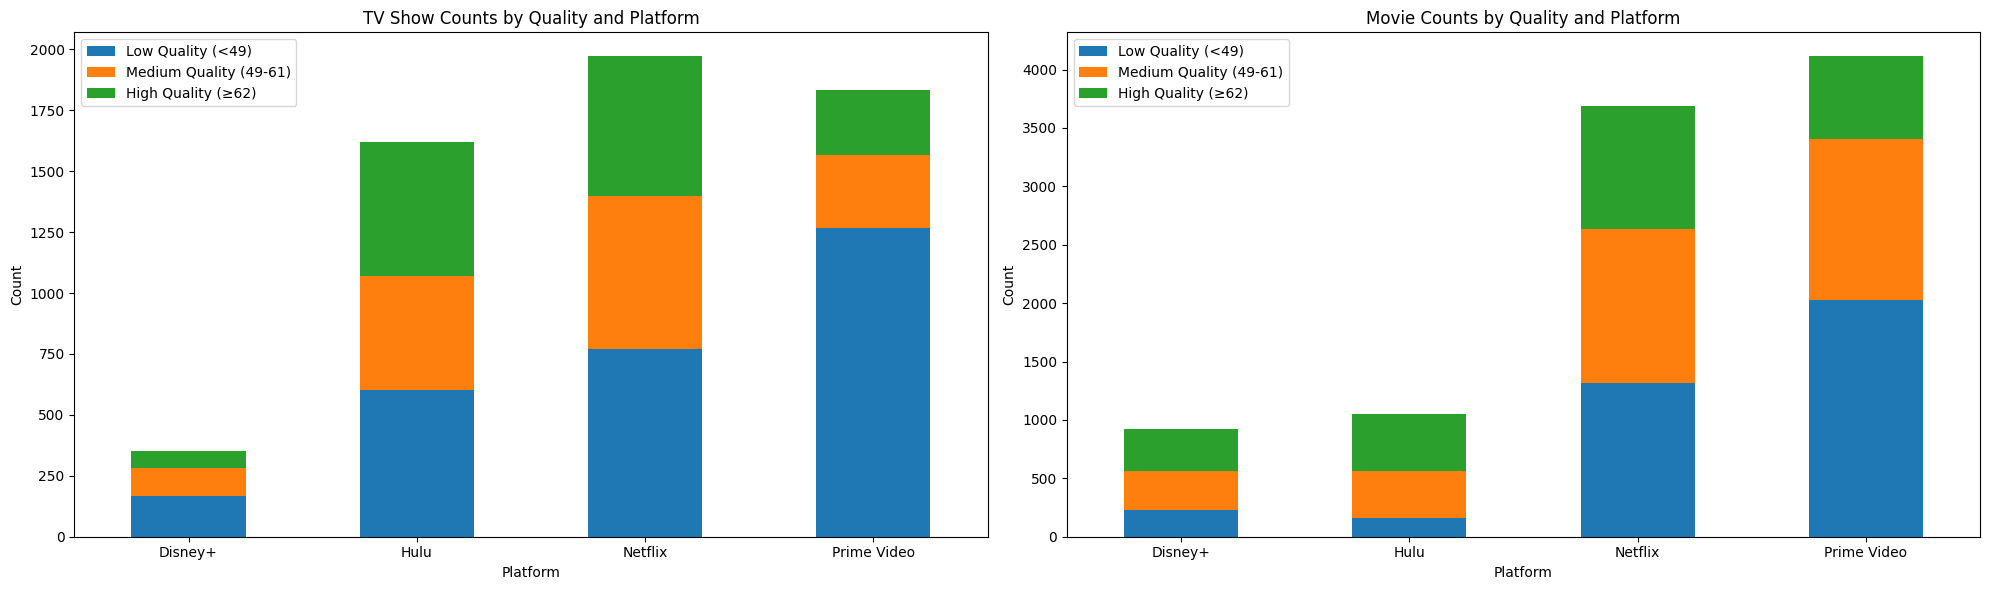

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

titles = ['TV Show Counts by Quality and Platform', 'Movie Counts by Quality and Platform']
data = [tv_show_counts, movie_counts]

for ax, counts, title in zip(axes, data, titles):
    counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Platform')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)
    ax.legend()

plt.tight_layout()
plt.show()

Netflix offers the most extensive collection of quality TV shows and movies. It provides 1,312 movies and 629 TV shows meeting the quality threshold of 49 or more. Among these, it leads in high-quality content with 1,057 high-quality movies and 571 high-quality TV shows.

Prime Video also boasts a substantial catalogue, featuring 1,372 medium-quality movies and 301 TV shows. Despite having the lowest percentage of high-quality content, especially for TV shows, the sheer volume of quality titles establishes Prime Video as a significant competitor in the streaming market.

Hulu stands out for its high percentage of quality content in both TV shows and movies. It offers 469 TV shows with quality scores of 49 or more and 402 movies meeting the same threshold. It has a substantial number of high-quality TV shows (552) and movies (485), but its overall total is lower than that of Netflix and Prime Video.

Disney+ has the lowest total count of medium-quality TV shows (118) and movies (330). It also has fewer high-quality titles (67 TV shows and 359 movies) compared to other platforms.